In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [3]:
df = pd.read_csv('kc_house_data_test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<AxesSubplot:>

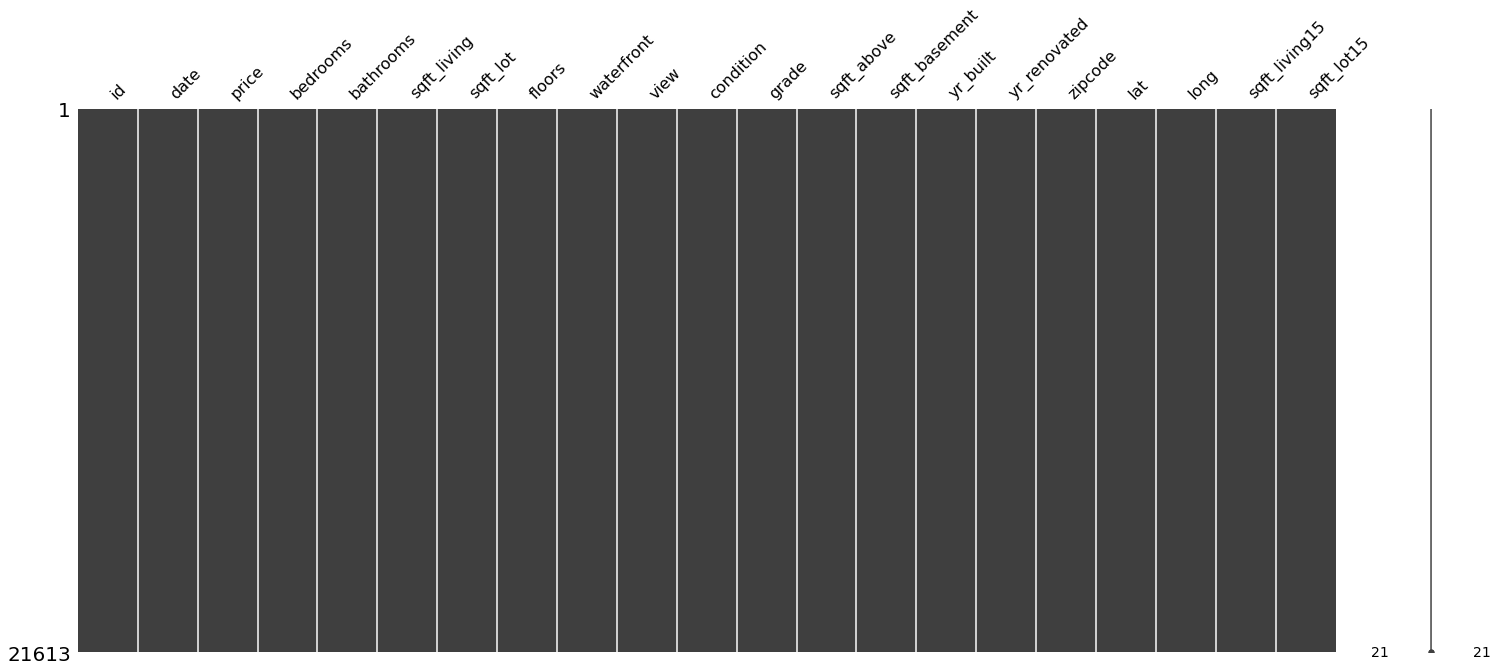

In [6]:
msno.matrix(df)

In [7]:
corr = df.corr()

In [8]:
corr_to_price = df.drop('price', axis=1).corrwith(df['price'])


<AxesSubplot:>

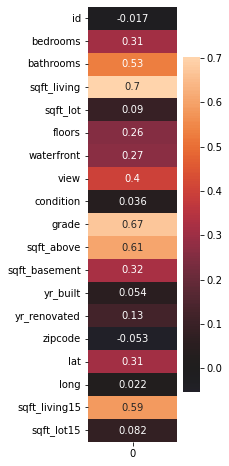

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(2,8)

sns.heatmap(pd.DataFrame(corr_to_price), center=0, ax=ax, annot=True)

In [10]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

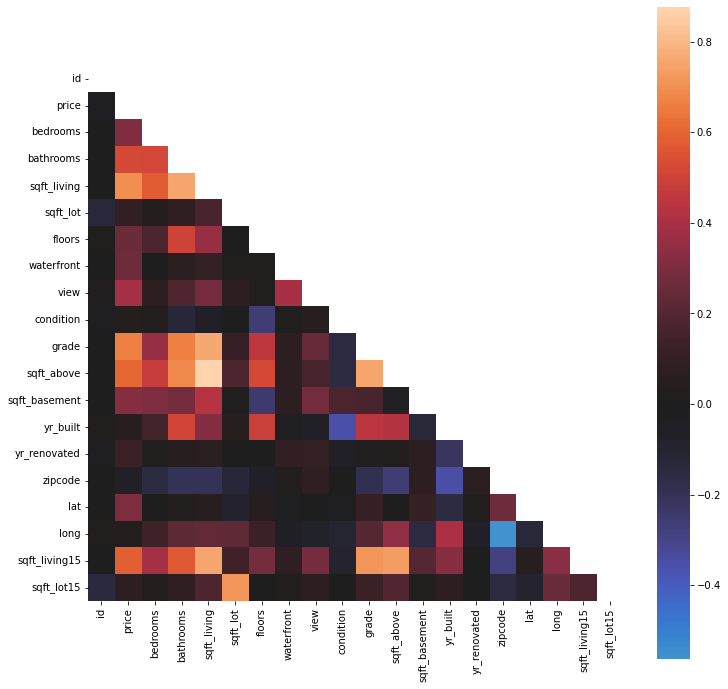

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr, mask=mask, center = 0, square =True, ax = ax, annot=False)
plt.show()

In [12]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
import numpy as np

In [14]:
# import plotly.express as px
# fig = px.scatter_geo(df, lat=df.lat,
#                         lon=df.long,
#                         z=np.log(df.price), radius=3,
#                         center=dict(lat=47.5, lon=-122.4), zoom=8,
#                         mapbox_style="stamen-terrain")
# fig.show()

In [15]:
import plotly.express as px
fig = px.density_mapbox(df, lat=df.lat,
                        lon=df.long,
                        z=np.log(df.price), radius=3,
                        center=dict(lat=47.5, lon=-122.4), zoom=8,
                        mapbox_style="stamen-terrain")
fig.show()

In [16]:
df['zipcode'] = df['zipcode'].astype('str')

In [17]:
df = df.drop(['date'], axis=1)

In [18]:
df_dum = pd.get_dummies(df)

In [19]:
df_dum.corrwith(df['price'])

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
zipcode_98001   -0.092179
zipcode_98002   -0.080300
zipcode_98003   -0.076761
zipcode_98004    0.271131
zipcode_98005    0.065114
zipcode_98006    0.133695
zipcode_98007    0.017000
zipcode_98008    0.033076
zipcode_98010   -0.021621
zipcode_98011   -0.012927
zipcode_98014   -0.017478
zipcode_98019   -0.029577
zipcode_98022   -0.063943
zipcode_98023   -0.106093
zipcode_98024    0.006756
zipcode_98027    0.029201
zipcode_98028   -0.024350
zipcode_98029    0.024270
zipcode_98030   -0.072737
zipcode_9803

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [21]:
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [22]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

In [23]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())

In [24]:
my_pipe_lasso.fit(X_train, y_train)

/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+14, tolerance: 2.205e+11



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['id', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [25]:
my_pipe_lasso.score(X_test, y_test)

0.8703191637242115

In [26]:
y_pred = my_pipe_lasso.predict(X_train)

In [27]:
residual = (y_train - y_pred).abs().sort_values()

In [28]:
to_drop = residual[residual > 500000].index

In [29]:
df_cleaned = df.drop(to_drop)

In [30]:
df_cleaned

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



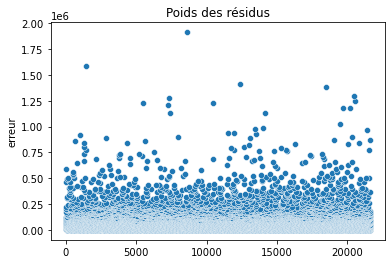

In [31]:
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [32]:
df[df.bedrooms == 33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [33]:
residual[residual.index == 15870]

15870    28876.950158
Name: price, dtype: float64

In [34]:
X = df_cleaned.drop('price', axis=1)
y = df_cleaned.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", my_num_pipe, num_col)
])

In [35]:
my_pipe_lasso = make_pipeline(preprocessing, Lasso())
my_pipe_lasso.fit(X_train, y_train)

/home/sahboun/miniconda3/envs/osp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.155e+13, tolerance: 1.824e+11



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['id', 'bedrooms',
                                                   'bathrooms', 'sqft_living',
                                                   'sqft_lot', 'floors',
                                                   'waterfront', 'view',
                                                   'condition', 'grade',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('lasso', Lasso())])

In [36]:
my_pipe_lasso.score(X_test, y_test)

0.8840862247951194

In [37]:
param={"lasso__alpha":np.linspace(0,1,50)}
#dans mon pipe lasso lasso, prendre les valeur tous les 50 pas
param

{'lasso__alpha': array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
        0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
        0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
        0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
        0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
        0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])}

In [38]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle =True)

In [39]:


RandomForestRegressorModel = RandomForestRegressor(n_estimators=300,max_depth=13, random_state=0)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))



Random Forest Regressor Train Score is :  0.4915273862730636
Random Forest Regressor Test Score is :  0.2970534702102843


In [40]:


GBRModel = GradientBoostingRegressor(n_estimators=300,max_depth=5,learning_rate = 0.1 ,random_state=33)
GBRModel.fit(X_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))



GBRModel Train Score is :  0.5124703390145533
GBRModel Test Score is :  0.28561229752891415


In [41]:
#The function below builds the model and returns cross validation scores, train score and learning curve data
def learn_curve(X,y,c):
    ''' param X: Matrix of input features
            param y: Vector of Target/Label
            c: Inverse Regularization variable to control overfitting (high value causes overfitting, low value causes underfitting)
        '''
    '''We aren't splitting the data into train and test because we will use StratifiedKFoldCV.
        KFold CV is a preferred method compared to hold out CV, since the model is tested on all the examples.
        Hold out CV is preferred when the model takes too long to train and we have a huge test set that truly represents the universe
        '''
        
    le = LabelEncoder() # Label encoding the target
    sc = StandardScaler() # Scaling the input features
    y = le.fit_transform(y)#Label Encoding the target
    log_reg = LogisticRegression(max_iter=200,random_state=11,C=c) # LogisticRegression model
    # Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
    lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',log_reg]))


    cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
    cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold


    lr.fit(X,y) # Fitting the model

    train_score = lr.score(X,y) # Scoring the model on train set

    #Building the learning curve
    train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
    train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
    test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
    lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")
    return {"cv_scores":cv_scores,
        "train_score":train_score,
        "learning_curve":lc}

In [43]:


from sklearn.preprocessing import MinMaxScaler



scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add((Dense(1)))

model.compile(optimizer='adam',loss='mse')



model.fit(X_train_sc,y=y_train,validation_data = (X_test_sc,y_test),batch_size=256,epochs = 400)



Epoch 1/400


2022-08-09 13:44:32.523441: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-08-09 13:44:32.523472: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sahboun-HP-ZBook-15-G3): /proc/driver/nvidia/version does not exist
2022-08-09 13:44:32.523735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


68/68 [==============================] - 1s 7ms/step - loss: 29042055933377642496.0000 - val_loss: 30098715194972700672.0000
Epoch 2/400
68/68 [==============================] - 0s 3ms/step - loss: 29042053734354386944.0000 - val_loss: 30098715194972700672.0000
Epoch 3/400
68/68 [==============================] - 0s 3ms/step - loss: 29042051535331131392.0000 - val_loss: 30098708597902934016.0000
Epoch 4/400
68/68 [==============================] - 0s 2ms/step - loss: 29042038341191598080.0000 - val_loss: 30098669015484334080.0000
Epoch 5/400
68/68 [==============================] - 0s 2ms/step - loss: 29041959176354398208.0000 - val_loss: 30098541472135512064.0000
Epoch 6/400
68/68 [==============================] - 0s 2ms/step - loss: 29041745871098609664.0000 - val_loss: 30098209419623923712.0000
Epoch 7/400
68/68 [==============================] - 0s 2ms/step - loss: 29041251090866110464.0000 - val_loss: 30097507931205402624.0000
Epoch 8/400
68/68 [==============================] - 

<AxesSubplot:>

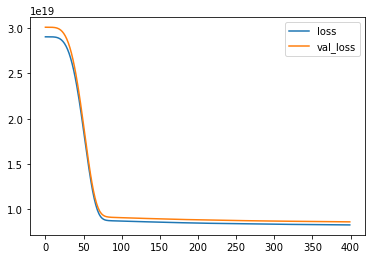

In [44]:


loss = pd.DataFrame(model.history.history)
loss.plot()



In [45]:


from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score,accuracy_score



In [46]:


predictions = model.predict(X_test_sc)
mean_squared_error(y_test,predictions)



136/136 [==============================] - 0s 1ms/step


8.61529142181463e+18

In [47]:


print('Average error in each predictions = ',mean_absolute_error(y_test,predictions))
print('R2 = ', r2_score(y_test,predictions))



Average error in each predictions =  2583997011.122369
R2 =  -0.009319428037319444


In [48]:
explained_variance_score(y_test,predictions)


-0.00803337977181906

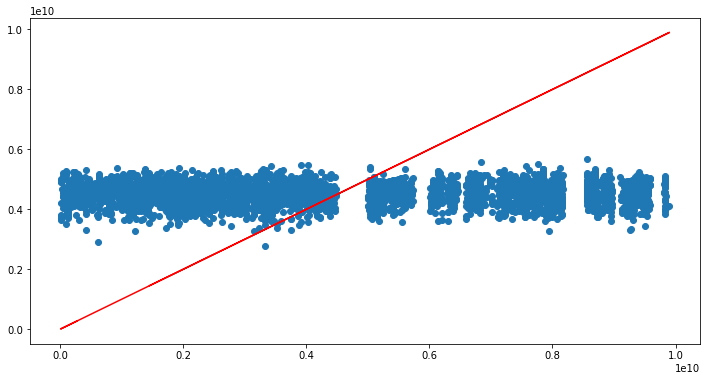

In [49]:
#Ma prédiction comparé aux vrais valeurs

plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')



In [ ]:
lc = learn_curve(X,y,1)


ValueError: n_splits=5 cannot be greater than the number of members in each class.